# **Posttest 5**
Yosua Bayu Wiranata

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

## **Supervised Learning**

### Linear Regression

Memisahkan fitur dan target dari dataset

In [163]:
X, y = Employee[['Year']], Employee['TotalPayBenefits']

Membagi data fitur dan target menjadi data training

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

Membuat model regresi linear, melatih model dengan data training dan menggunakan model untuk membuat prediksi pada data test

In [166]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

Visualisasi hasil prediksi regresi linear pada data test yang membandingkan prediksi (garis biru) dengan data asli (titik hitam) untuk melihat sejauh mana model cocok dengan data aktual

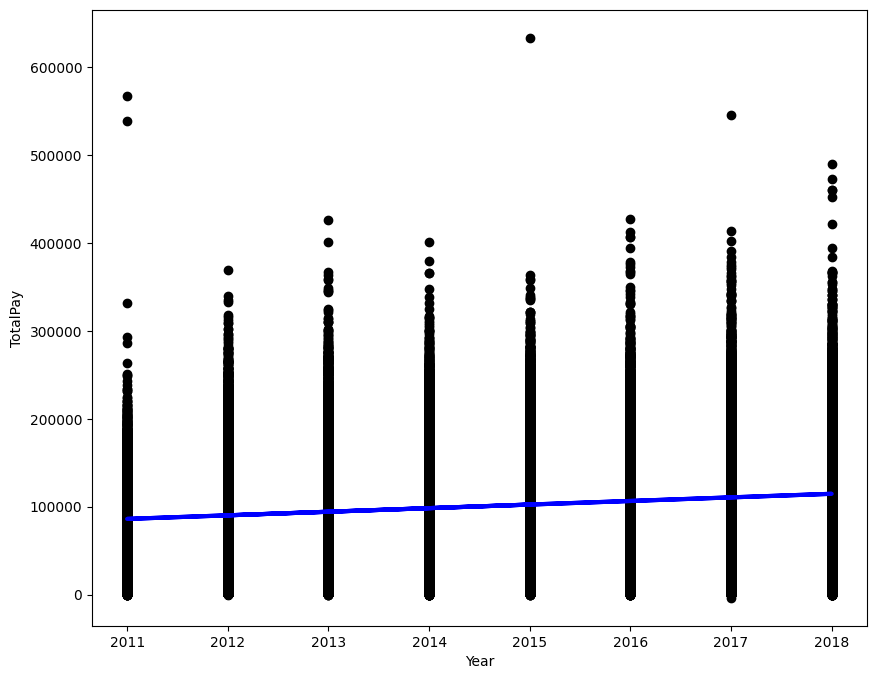

In [167]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='blue', linewidth=3)
plt.scatter(X_test, y_test, c='Black')
plt.xlabel("Year")
plt.ylabel("TotalPay")
plt.show()

In [168]:
svm = SVC(kernel="linear")

In [131]:
Employee.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeName      6001 non-null   object 
 1   JobTitle          6001 non-null   object 
 2   BasePay           6001 non-null   object 
 3   OvertimePay       6001 non-null   object 
 4   OtherPay          6001 non-null   object 
 5   Benefits          6001 non-null   object 
 6   TotalPay          6001 non-null   float64
 7   TotalPayBenefits  6001 non-null   float64
 8   Year              6001 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 422.1+ KB


In [177]:
SVC(kernel='linear')

SVC(kernel='linear')

In [178]:

print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 52327.15836110656
MSE : 4335538726.235121
RMSE : 65844.80789124622
R-Squared : 0.02008651448142429


## Unsupervised Learning

### K-Means

Menggunakan fitur X dan menentukan banyaknya kelompok

In [182]:
X = Employee[["TotalPayBenefits", "TotalPay"]]
K = 2

Inisialisasi K-Means dan melatih model K-Means berdasarkan data X



In [183]:

kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

Membuat label kelompok dari model dan tambah kolom prediksi serta titik pusat kelompok dari model

In [186]:
cluster_labels = kmeans.labels_
Employee["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

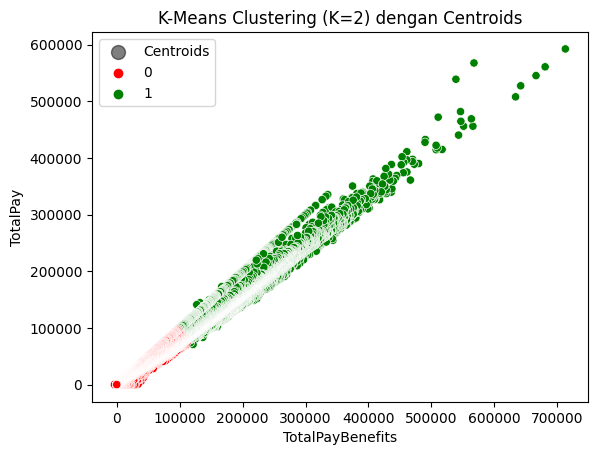

In [192]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=Employee, x="TotalPayBenefits", y="TotalPay", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("TotalPayBenefits")
plt.ylabel("TotalPay")
plt.legend()
plt.show()

Membuat crosstab untuk membandingkan cluster labels dengan true labels

In [193]:
cross_tab = pd.crosstab(Employee["cluster"], Employee["TotalPay"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
TotalPay  -618.13     -498.12     -292.40     -60.00       0.00       \
cluster                                                                
0                  1           1           1           1         704   
1                  0           0           0           0           0   

TotalPay   0.01        0.04        0.05        0.06        0.11       ...  \
cluster                                                               ...   
0                  1           1           1           1           1  ...   
1                  0           0           0           0           0  ...   

TotalPay   468997.01   471952.64   481811.80   507831.60   527343.14  \
cluster                                                                
0                  0           0           0           0           0   
1                  1           1           1           1           1   

TotalPay   538909.28   545294.86   560793.00   567595.43   592394.34  
cluster                 

Menghitung dan mencetak nilai "Adjusted Rand Index (ARI)" yang mengukur sejauh mana clustering dengan algoritma K-Means

In [196]:
ari = adjusted_rand_score(Employee["TotalPay"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


Menghitung dan mencetak nilai "Normalized Mutual Information (NMI)" untuk mengevaluasi sejauh mana hasil clustering dengan algoritma K-Means

In [195]:
true_labels_num = Employee["TotalPayBenefits"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.10


Homogeneity, Completeness dan V-Measure membantu mengukur sejauh mana hasil klustering sesuai dengan label asli data dan seberapa baik klustering tersebut dalam mengelompokkan data

In [197]:
homogeneity = homogeneity_score(Employee["TotalPayBenefits"], cluster_labels)
completeness = completeness_score(Employee["TotalPayBenefits"], cluster_labels)
v_measure = v_measure_score(Employee["TotalPayBenefits"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


Homogeneity Score: 0.05
Completeness Score: 1.00
V-Measure Score: 0.10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


File Csv

https://drive.google.com/drive/u/0/folders/1_J82UBuVA2afTnUj6PmD5JyOviCe2oMP